<a href="https://colab.research.google.com/github/choiboy92/knee_parallax/blob/main/np_stl_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Import necessary packages
!pip install numpy-stl
import numpy as np
from stl import mesh
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math

exception (0, "Cannot read normals (2:b'#1\\xbf')")


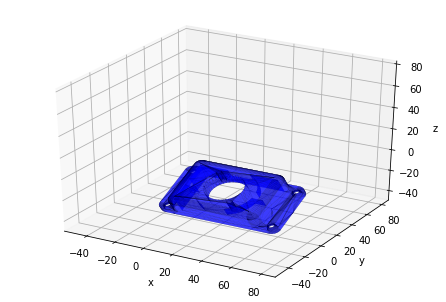

In [56]:
# Create a new plot
fig = plt.figure()
ax = mplot3d.Axes3D(fig)

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file('Dad Connector.STL')
your_mesh.rotate(axis=[1, 0, 0], theta=math.radians(-120))  #define vector for axis of rotation
collection = mplot3d.art3d.Poly3DCollection(your_mesh.vectors, closed=True, alpha=0.5, linewidth=0.1, facecolor="blue", edgecolor="black")
ax.add_collection3d(collection)

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
ax.auto_scale_xyz(scale, scale, scale)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

# Show the plot to the screen
plt.show()